# 1- <u>Description</u>

## 1-1- <u>Objectif</u>
Le but de ce projet est d'appliquer les algorithmes DBSCAN et K-MEANS pour segmenter la clientele d'une banque indienne afin comprendre le comportement des ces derniers en fonction de leurs transactions et de leurs solde disponible.

## 1-2- <u>Presentation des variables</u>

Le jeu de donnees bank_transaction a été téléchargé sur kaggle depuis le lien suivant: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation. 

Le jeu de donnée contient 1.048.567 transactions effectuer par 884.265 clients de la banque. Il contient egalement les variables suivantes:

- **TransactionID** : Identification unique pour chaque transaction.

- **CustomerID** : Identification unique pour chaque client.

- **CustomerDOB** : Date de naissance du client.

- **CustGender** : Genre du client (M/F).

- **CustLocation** : Localisation géographique du client.

- **CustAccountBalance** : Solde du compte du client au moment de la transaction.

- **TransactionDate** : Date de la transaction.

- **TransactionTime** : Heure de la transaction encodé au format **Unix Timestamp**

- **TransactionAmount (INR)** : Montant de la transaction en roupies indiennes (INR).

# 2- <u>Importation et nettoyage des donnees</u>

## 2-1- <u> Importation des bibliotheques</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


## 2-2- <u> Charegement des données</u>

In [2]:
df_bank = pd.read_csv("bank_transactions.csv")


In [3]:
df_bank.head(10)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


## 2-3- <u> Nettoyage des données </u>

In [4]:
# Verifions les valeurs manquantes
df_bank.isnull().sum()


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [5]:
# Remplacons la date de naissance par une valeur par defaut
df_bank['CustomerDOB'].fillna('1900-01-01', inplace=True)

# Remplacons le genre des client par une valeur par defaut
df_bank['CustGender'].fillna('Non Specifié', inplace=True)
df_bank['CustGender'] = df_bank['CustGender'].apply(lambda x: x if x in ['M', 'F'] else 'Non Specifié')

# Remplacons la localisation des client par une valeur par defaut
df_bank['CustLocation'].fillna('Non Specifié', inplace=True)

df_bank.isnull().sum()


C:\Users\Christian\AppData\Local\Temp\ipykernel_17420\3220596437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['CustomerDOB'].fillna('1900-01-01', inplace=True)
C:\Users\Christian\AppData\Local\Temp\ipykernel_17420\3220596437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                    0
CustLocation                  0
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [6]:
"""Remplacons la mediane en suivant le principe suivant:
- on calcule la mediane des soldes disponibles en banque car la moyenne est tres impacté par les valeurs extremes
- si le montant de la transaction pour un client est superieur a la médiane, alors on remplace le solde par le montant de la transaction
- sinon on remplace par la mediane"""

# Calcule de la médiane des montants en banque
solde_median = df_bank['CustAccountBalance'].median()

# Fonction pour remplacer les valeurs manquantes dans CustAccountBalance
def remplace(row):
    if pd.isnull(row['CustAccountBalance']):
        if solde_median < row['TransactionAmount (INR)']:
            return row['TransactionAmount (INR)']
        else:
            return solde_median
    else:
        return row['CustAccountBalance']

# Appliquons la fonction pour remplacer les valeurs manquantes
df_bank['CustAccountBalance'] = df_bank.apply(remplace, axis=1)

df_bank.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

# 3- <u>Analyses des données</u>

## 3-1- <u>Analyses univariéss</u>

In [7]:
# Affichons le types de chaques données
df_bank.dtypes


TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [8]:
# Description des données
df_bank.describe(include = "all")


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1048567,1048567,1048567,1048567,1048567,1.048567e+06,1048567,1.048567e+06,1.048567e+06
unique,1048567,884265,17255,3,9356,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,57339,765530,103595,NaN,27261,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.151821e+05,NaN,1.570875e+05,1.574335e+03
std,NaN,NaN,NaN,NaN,NaN,8.455415e+05,NaN,5.126185e+04,6.574743e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.740200e+03,NaN,1.240300e+05,1.610000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.679218e+04,NaN,1.642260e+05,4.590300e+02
75%,NaN,NaN,NaN,NaN,NaN,5.747582e+04,NaN,2.000100e+05,1.200000e+03


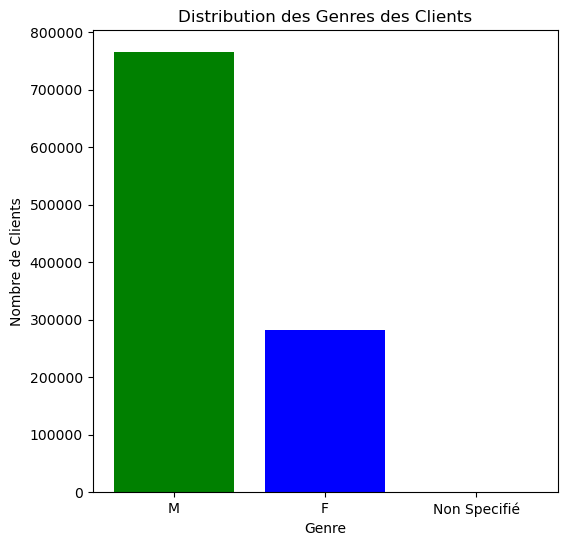

In [9]:
# Distribution du genre 
genre_counts = df_bank['CustGender'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(genre_counts.index, genre_counts.values, color=['green', 'blue'])
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.title('Distribution des Genres des Clients')
plt.show()


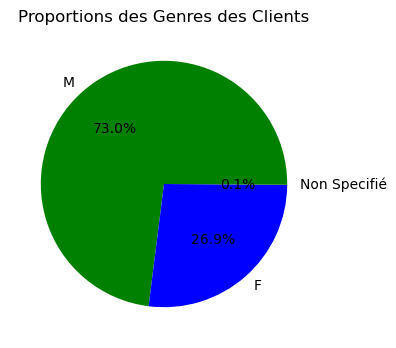

In [10]:
# Proportion des genres des clients
plt.figure(figsize=(4, 4)) 
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=['green','blue']) 
plt.title('Proportions des Genres des Clients') 
plt.show()


In [11]:
# Repartitions des localisations
localisations_unique = df_bank['CustLocation'].nunique() 
localisations_counts = df_bank['CustLocation'].value_counts() 
print(f"Nombre de localisations uniques : {localisations_unique}")
print(localisations_counts)


Nombre de localisations uniques : 9356
CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9356, dtype: int64


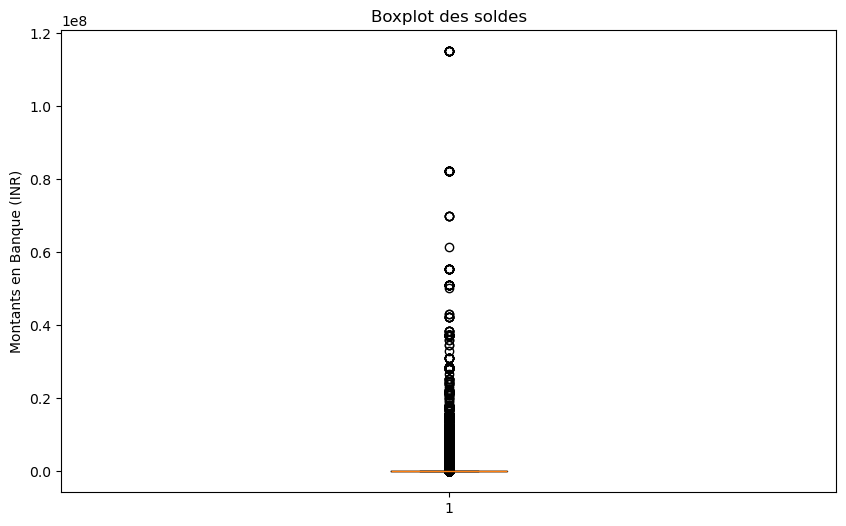

In [12]:
# Boxplot des soldes sans tenir comptes des valeurs manquantes ou transformé
solde_separe = df_bank['CustAccountBalance'].dropna()
plt.figure(figsize=(10, 6))
plt.boxplot(solde_separe)
plt.title('Boxplot des soldes')
plt.ylabel('Montants en Banque (INR)')
plt.show()


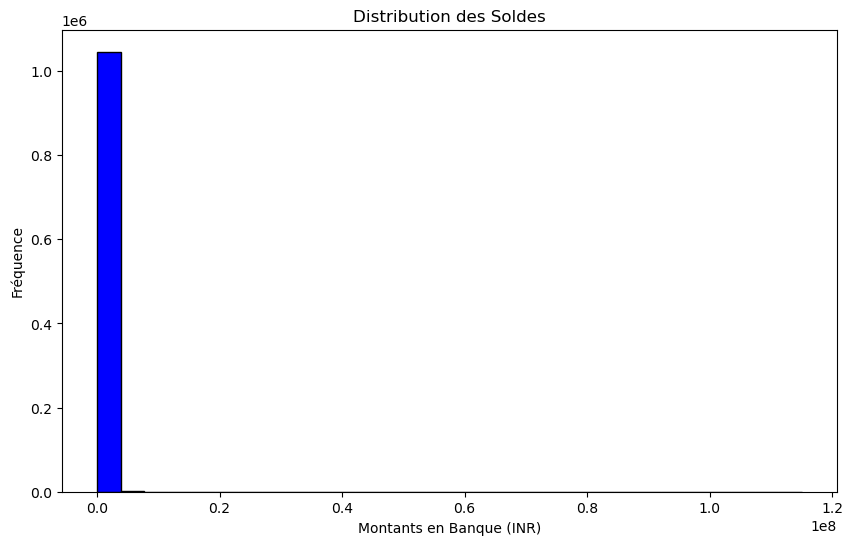

In [13]:
# Distribution des soldes
plt.figure(figsize=(10, 6))
plt.hist(df_bank['CustAccountBalance'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution des Soldes')
plt.xlabel('Montants en Banque (INR)')
plt.ylabel('Fréquence')
plt.show()


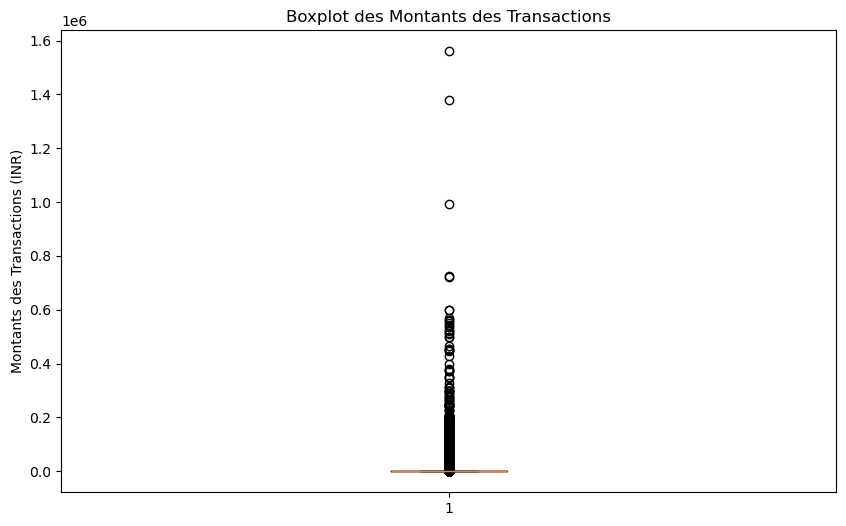

In [14]:
# Boxplot des montant des transaction
plt.figure(figsize=(10, 6))
plt.boxplot(df_bank['TransactionAmount (INR)'])
plt.title('Boxplot des Montants des Transactions')
plt.ylabel('Montants des Transactions (INR)')
plt.show()


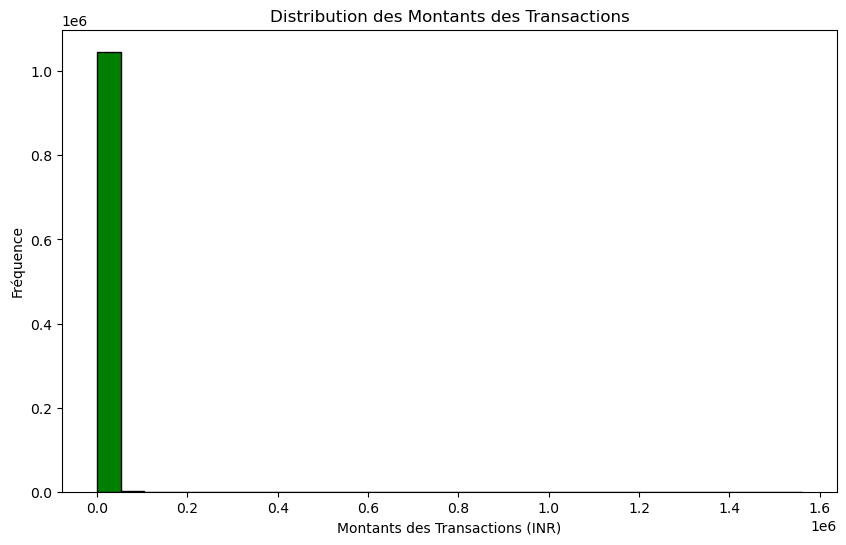

In [15]:
# Distribution des montants des transactions
plt.figure(figsize=(10, 6))
plt.hist(df_bank['TransactionAmount (INR)'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution des Montants des Transactions')
plt.xlabel('Montants des Transactions (INR)')
plt.ylabel('Fréquence')
plt.show()


## 3-2- <u>Analyses Bivaries</u>

In [16]:
# selection des variables pour l'analyse
variables = df_bank[['CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)']] 
variables.head()


,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,JAMSHEDPUR,17819.05,25.0
1,JHAJJAR,2270.69,27999.0
2,MUMBAI,17874.44,459.0
3,MUMBAI,866503.21,2060.0
4,NAVI MUMBAI,6714.43,1762.5


In [17]:
"""Nous allons encoder les localisations en conservant la hiérachie de ces differentes localisations. Chaque localisation sera remplacé par sa son nombre d'occurence 
CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
.
.
."""
# Création d'un DataFrame à partir de location_counts 
localisations_counts_df = localisations_counts.reset_index() 
localisations_counts_df.columns = ['CustLocation', 'LocationCount'] 

# Remplacer 'Non Specifié' par NaN pour l'encodage
variables['CustLocation'].replace('Non Specifié', pd.NA, inplace=True)
localisations_counts_df.head()


C:\Users\Christian\AppData\Local\Temp\ipykernel_17420\3115865608.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variables['CustLocation'].replace('Non Specifié', pd.NA, inplace=True)
C:\Users\Christian\AppData\Local\Temp\ipykernel_17420\3115865608.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['CustLocation'].replace('Non

,CustLocation,LocationCount
0,MUMBAI,103595
1,NEW DELHI,84928
2,BANGALORE,81555
3,GURGAON,73818
4,DELHI,71019


In [18]:
# Fusion du DataFrame avec les données sélectionnées
encoded_df = variables.merge(localisations_counts_df, on='CustLocation', how='left')

# Remplacer les valeurs NaN par 0
encoded_df['LocationCount'].fillna(0, inplace=True)
encoded_df.head()


C:\Users\Christian\AppData\Local\Temp\ipykernel_17420\1408127332.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoded_df['LocationCount'].fillna(0, inplace=True)


,CustLocation,CustAccountBalance,TransactionAmount (INR),LocationCount
0,JAMSHEDPUR,17819.05,25.0,1582.0
1,JHAJJAR,2270.69,27999.0,862.0
2,MUMBAI,17874.44,459.0,103595.0
3,MUMBAI,866503.21,2060.0,103595.0
4,NAVI MUMBAI,6714.43,1762.5,13080.0


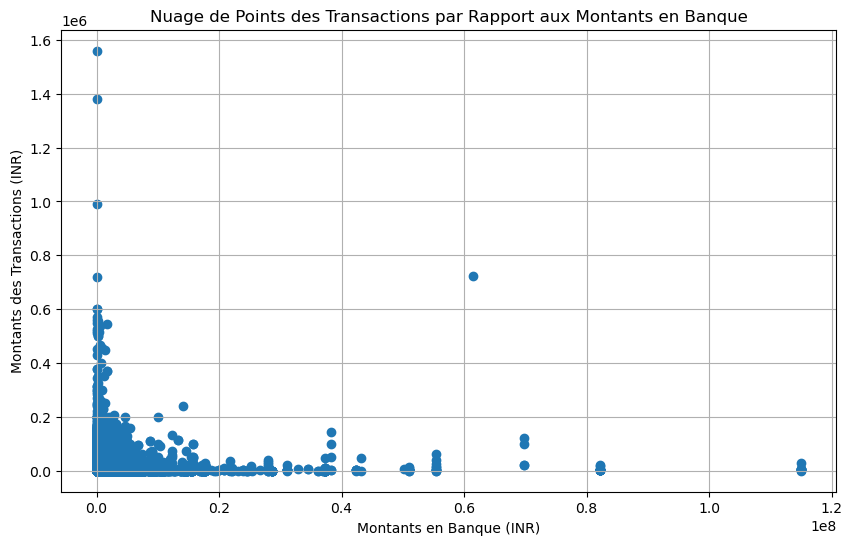

In [19]:
# Nuages des points des transactions=f(soldes)
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['CustAccountBalance'], encoded_df['TransactionAmount (INR)'])
plt.title('Nuage de Points des Transactions par Rapport aux Montants en Banque')
plt.xlabel('Montants en Banque (INR)')
plt.ylabel('Montants des Transactions (INR)')
plt.grid(True)
plt.show()


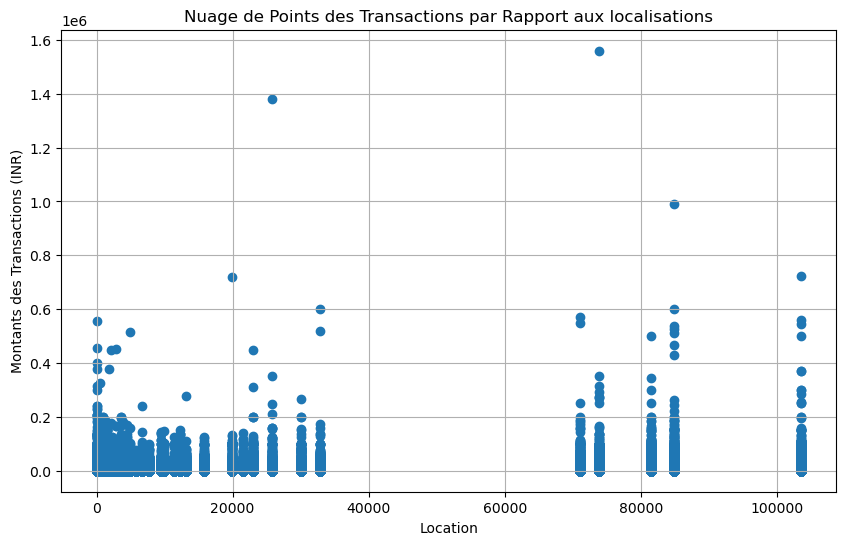

In [20]:
# Nuages des points des transactions=f(localisations)
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['LocationCount'], encoded_df['TransactionAmount (INR)'])
plt.title('Nuage de Points des Transactions par Rapport aux localisations')
plt.xlabel('Location')
plt.ylabel('Montants des Transactions (INR)')
plt.grid(True)
plt.show()


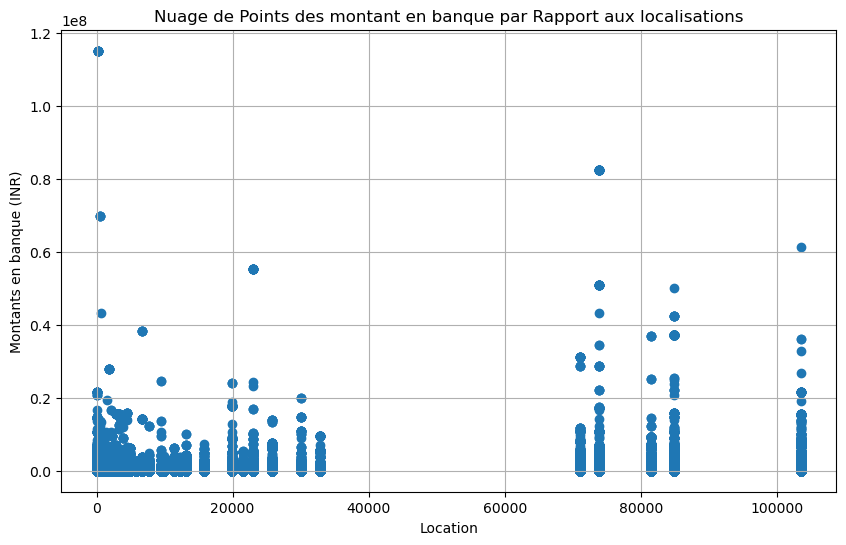

In [21]:
# Nuages des points des soldes=f(localisations)
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['LocationCount'], encoded_df['CustAccountBalance'])
plt.title('Nuage de Points des montant en banque par Rapport aux localisations')
plt.xlabel('Location')
plt.ylabel('Montants en banque (INR)')
plt.grid(True)
plt.show()


# 4- <u>Clustering</u>

## 4-1- <u>Preparation des donnees</u>

In [22]:
from sklearn.preprocessing import StandardScaler

#selection des donnees pour les algorithmes
data = encoded_df[['CustAccountBalance', 'TransactionAmount (INR)', 'LocationCount']]

# Normaliser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [23]:
# Fixons la graine
np.random.seed(42)

# Prenons un échantillon representatif du dataset pour accelerer l'algorithme 3%
sampled_indices = np.random.choice(scaled_data.shape[0], int(scaled_data.shape[0] * 0.03), replace=False) 
sampled_data = scaled_data[sampled_indices]


## 4-2- <u>DBSCAN</u>

### 4-2-1- <u>Execution</u>

In [24]:
from sklearn.cluster import DBSCAN

# Appliquons DBSCAN avec eps = 0.9 et min_points = 3
dbscan = DBSCAN(eps=0.9, min_samples=3)
clusters = dbscan.fit_predict(sampled_data)


In [25]:
# Créer un DataFrame pour les données échantillonnées et ajouter les clusters
sampled_df = variables.iloc[sampled_indices].copy() 
sampled_df['Cluster'] = clusters
sampled_df.head()


,CustLocation,CustAccountBalance,TransactionAmount (INR),Cluster
892845,JASPUR,84447.82,11858.0,0
444994,GURGAON,12549.49,250.0,1
614896,NEW DELHI,33607.65,3360.0,1
457036,HYDERABAD,38238.86,250.0,0
997441,PURBO MEDINIPUR,9506.85,33.0,0


In [26]:
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) 
num_noise = list(clusters).count(-1) 
# Afficher les résultats 
print(f"Nombre de clusters trouvés : {num_clusters}") 
print(f"Nombre de points de bruit : {num_noise}")


Nombre de clusters trouvés : 5
Nombre de points de bruit : 41


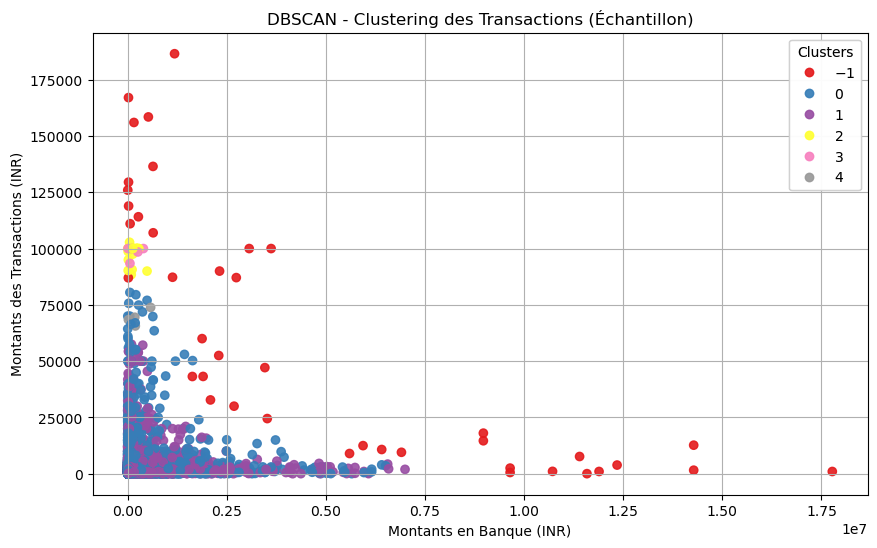

In [27]:
# Ajouter les clusters au DataFrame original
#sampled_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(sampled_df['CustAccountBalance'], sampled_df['TransactionAmount (INR)'], c=sampled_df['Cluster'], cmap='Set1', alpha=0.9) 
plt.title('DBSCAN - Clustering des Transactions (Échantillon)') 
plt.xlabel('Montants en Banque (INR)') 
plt.ylabel('Montants des Transactions (INR)') 
plt.grid(True) 
# Ajouter la légende 
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters") 
plt.gca().add_artist(legend1)
plt.show()

### 4-2-2- <u>Evaluation</u>

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcul de la silhouette score
silhouette_avg = silhouette_score(sampled_data, clusters)
print(f"Le coefficient de Silhouette est: {silhouette_avg:.3f}")

# Calcul de l'indice de Davies-Bouldin
davies_bouldin_avg = davies_bouldin_score(sampled_data, clusters)
print(f"L'indice de Davies-Bouldin est: {davies_bouldin_avg:.3f}")


Le coefficient de Silhouette est: 0.704
L'indice de Davies-Bouldin est: 1.304


**Un coefficient de silhouette de 0.7 et un indice de 1.5 indique que les clusters sont assez bien formés. Cela suggère que les clusters sont assez bien définis. En d'autres termes, les points au sein de chaque cluster sont assez proches les uns des autres, et les clusters eux-mêmes sont relativement bien séparés les uns des autres.**

## 4-3- <u>KMEANS</u>

### 4-3-1- <u>Graphique de la Coude</u>

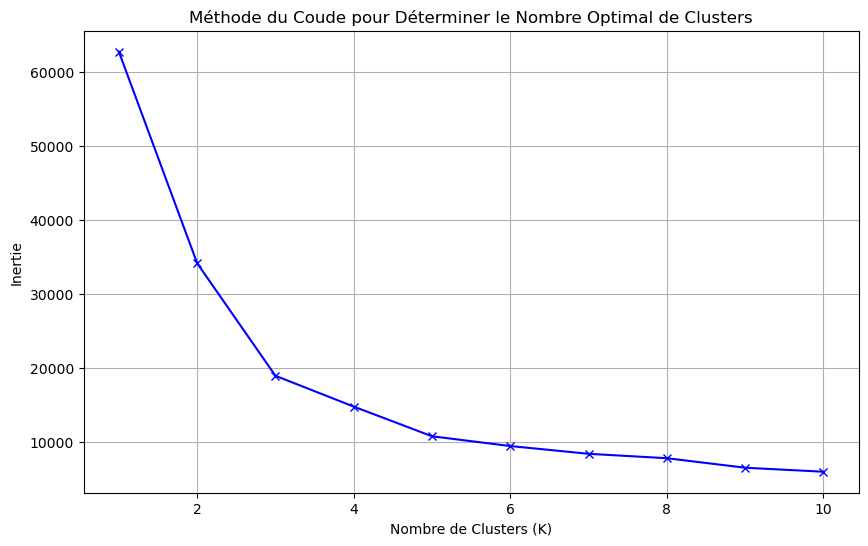

In [29]:
from sklearn.cluster import KMeans

# Calcul de l'inertie pour différents K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sampled_data)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.grid(True)
plt.show()


**D'apres notre graphique on se rend compte que le nombre optimal de clusters c'est 5**

### 4-3-2- <u>Application de KMEANS</u>

In [30]:
# Appliquons K-Means avec 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(sampled_data)


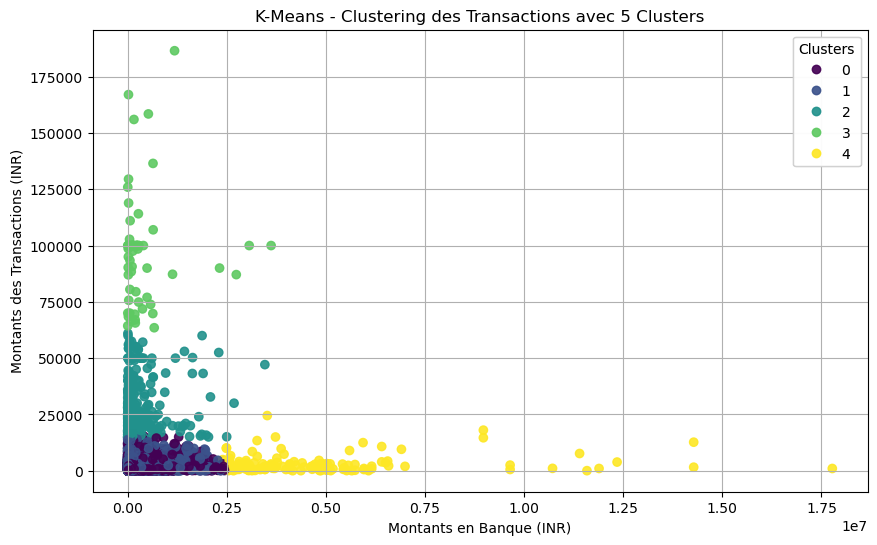

In [31]:
# Ajouter les clusters au DataFrame original
sampled_df['Cluster'] = clusters

# Visualiser les clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(sampled_df['CustAccountBalance'], sampled_df['TransactionAmount (INR)'], c=sampled_df['Cluster'], cmap='viridis', alpha=0.9)
plt.title('K-Means - Clustering des Transactions avec 5 Clusters')
plt.xlabel('Montants en Banque (INR)')
plt.ylabel('Montants des Transactions (INR)')
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()


In [32]:
# Créer un DataFrame pour les données échantillonnées et ajouter les clusters
sampled_df = variables.iloc[sampled_indices].copy() 
sampled_df['Cluster'] = clusters
sampled_df.head()


,CustLocation,CustAccountBalance,TransactionAmount (INR),Cluster
892845,JASPUR,84447.82,11858.0,1
444994,GURGAON,12549.49,250.0,0
614896,NEW DELHI,33607.65,3360.0,0
457036,HYDERABAD,38238.86,250.0,1
997441,PURBO MEDINIPUR,9506.85,33.0,1


In [33]:
# Calcul de la silhouette score pour K-Means
silhouette_avg = silhouette_score(sampled_data, clusters)
print(f"Le coefficient de Silhouette est: {silhouette_avg:.3f}")

# Calcul de l'indice de Davies-Bouldin pour K-Means
davies_bouldin_avg = davies_bouldin_score(sampled_data, clusters)
print(f"L'indice de Davies-Bouldin est: {davies_bouldin_avg:.3f}")


Le coefficient de Silhouette est: 0.734
L'indice de Davies-Bouldin est: 0.578


**Un coefficient de silhouette de 0.73 et un indice de 0.57 indique que les clusters sont bien formés. Cela suggère que les clusters sont vraiment bien définis. En d'autres termes, les points au sein de chaque cluster sont tres proches les uns des autres, et les clusters eux-mêmes sont relativement bien séparés les uns des autres.**
